In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.4.0
GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [ ]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [ ]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

#### Inspect the dataset

In [ ]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [ ]:
# Inspect the shape of the data

x_train.shape

(25000,)

In [ ]:
# Display the first dataset element input
# Notice encoding

x_train[0]

In [ ]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults

imdb.load_data(path='imdb.npz', index_from=3)

# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words=1000)

In [ ]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10, num_words=1000, oov_char=2)

In [ ]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(maxlen=500)

In [ ]:
 # Use '1' as the character that indicates the start of a sequence

imdb.load_data(start_char=1)

#### Explore the dataset word index

In [ ]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
# View the word index as a dictionary,
# accounting for index_from.

index_from = 3
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}

In [ ]:
# Retrieve a specific word's index

imdb_word_index['simpsonian']

52256

In [ ]:
imdb_word_index['the']

4

In [ ]:
# View an input sentence

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [ ]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [ ]:
# Load the imdb data set

import tensorflow.keras.datasets.imdb as imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

#### Preprocess the data with padding

In [ ]:
# Inspect the input data shape

x_train.shape

(25000,)

In [ ]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')

In [ ]:
# Inspect the output data shape

padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [ ]:
# Import numpy 

import numpy as np

In [ ]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, -1)

In [ ]:
padded_x_train.shape

(25000, 300, 1)

In [ ]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [ ]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [ ]:
# Look at the dataset

masked_x_train[0]

<tf.Tensor: shape=(300, 1), dtype=float32, numpy=
array([[1.0000e+00],
       [1.4000e+01],
       [2.2000e+01],
       [1.6000e+01],
       [4.3000e+01],
       [5.3000e+02],
       [9.7300e+02],
       [1.6220e+03],
       [1.3850e+03],
       [6.5000e+01],
       [4.5800e+02],
       [4.4680e+03],
       [6.6000e+01],
       [3.9410e+03],
       [4.0000e+00],
       [1.7300e+02],
       [3.6000e+01],
       [2.5600e+02],
       [5.0000e+00],
       [2.5000e+01],
       [1.0000e+02],
       [4.3000e+01],
       [8.3800e+02],
       [1.1200e+02],
       [5.0000e+01],
       [6.7000e+02],
       [2.2665e+04],
       [9.0000e+00],
       [3.5000e+01],
       [4.8000e+02],
       [2.8400e+02],
       [5.0000e+00],
       [1.5000e+02],
       [4.0000e+00],
       [1.7200e+02],
       [1.1200e+02],
       [1.6700e+02],
       [2.1631e+04],
       [3.3600e+02],
       [3.8500e+02],
       [3.9000e+01],
       [4.0000e+00],
       [1.7200e+02],
       [4.5360e+03],
       [1.1110e+03],
     

In [ ]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [ ]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [ ]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0], [1], [5], [500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.0250255 , -0.02126033,  0.03991226, -0.00748583,
          -0.03666276, -0.02920407,  0.04028619,  0.04642922,
           0.03759818, -0.03417207,  0.03822808,  0.0114421 ,
          -0.03697283, -0.02312614,  0.01459697, -0.02751688]],

        [[-0.04568798, -0.00534292,  0.01415421, -0.0322988 ,
           0.03015688,  0.0400962 ,  0.0343065 , -0.00538914,
           0.02835311, -0.02426771, -0.02757987, -0.04145324,
          -0.04415271, -0.01346062,  0.02139914, -0.00642227]],

        [[ 0.04820662, -0.02861469,  0.04124482, -0.01027117,
          -0.03577543, -0.00584869,  0.00108083,  0.00272635,
          -0.0079003 , -0.03334834, -0.01184677, -0.03767923,
          -0.02948107,  0.03242772,  0.00967711,  0.03048519]],

        [[-0.0444218 , -0.03271331, -0.00352544, -0.00694091,
           0.00443875, -0.04903904,  0.00641724, -0.04933807,
          -0.0143819 , -0.00034203,  0.04762414,  0.0369609 ,
      

In [ ]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[ 0.0250255 , -0.02126033,  0.03991226, ..., -0.02312614,
         0.01459697, -0.02751688],
       [-0.04568798, -0.00534292,  0.01415421, ..., -0.01346062,
         0.02139914, -0.00642227],
       [ 0.04112849,  0.02720164, -0.01860169, ...,  0.01689072,
         0.0321471 , -0.03098547],
       ...,
       [ 0.04395029,  0.0347135 ,  0.0068198 , ...,  0.02703064,
         0.04510203, -0.02270099],
       [ 0.03600897,  0.00114552,  0.02667591, ..., -0.02437919,
        -0.02046038,  0.016516  ],
       [-0.0444218 , -0.03271331, -0.00352544, ...,  0.03794025,
         0.01272339,  0.02242079]], dtype=float32)

In [ ]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14, :]

array([-0.02448838,  0.0432871 , -0.04558095,  0.00266565, -0.0426646 ,
       -0.0370836 , -0.02404751,  0.04717355,  0.03429213,  0.02817028,
        0.00610013,  0.02016476,  0.00831809, -0.01077356,  0.00460368,
        0.00789315], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [ ]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [ ]:
sequence_of_indices

<tf.Tensor: shape=(1, 4, 1), dtype=int32, numpy=
array([[[  0],
        [  1],
        [  5],
        [500]]], dtype=int32)>

In [ ]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [ ]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [ ]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())

In [ ]:
# Specify an embedding dimension

embedding_dim = 16

In [ ]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value + 1, output_dim=embedding_dim, mask_zero=False),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
# Functional API refresher: use the Model to build the same model

review_sequence = tf.keras.Input((None,))
embedding_sequence = tf.keras.layers.Embedding(input_dim=max_index_value + 1, output_dim=embedding_dim)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(units=1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs=review_sequence, outputs=positive_probability)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [ ]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/5
782/782 [==============================] - 9s 8ms/step - loss: 0.6917 - accuracy: 0.5275 - val_loss: 0.6835 - val_accuracy: 0.5484
Epoch 2/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6761 - accuracy: 0.6536 - val_loss: 0.6467 - val_accuracy: 0.7172
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6379 - accuracy: 0.7340 - val_loss: 0.5985 - val_accuracy: 0.7625
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 0.5843 - accuracy: 0.7944 - val_loss: 0.5534 - val_accuracy: 0.7609
Epoch 5/5
782/782 [==============================] - 6s 8ms/step - loss: 0.5356 - accuracy: 0.8151 - val_loss: 0.5059 - val_accuracy: 0.7984


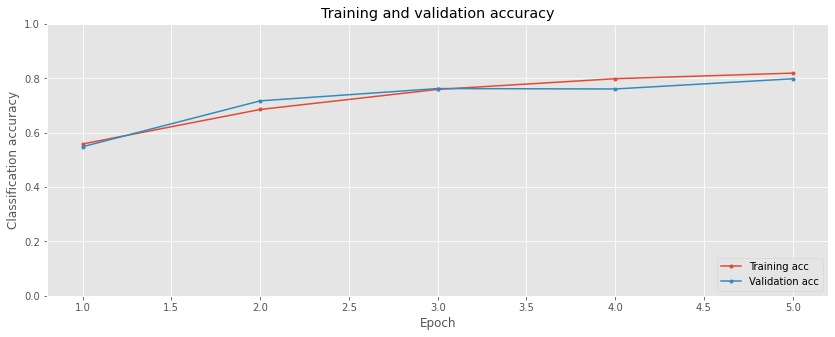

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [ ]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [ ]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('drive', 'MyDrive', 'Colab Notebooks', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('drive', 'MyDrive', 'Colab Notebooks', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [3]:
# Create a SimpleRNN layer and test it

simplernn_layer = tf.keras.layers.SimpleRNN(16)

In [4]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1., 1.], [2., 2.], [56., -100.]]])
layer_output = simplernn_layer(sequence)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[ 0.99965805,  0.99999976, -0.99999976,  0.99999976, -0.99999976,
         0.99999976,  0.99999976, -0.99999976,  0.99999976, -0.99999976,
         0.99999976,  0.99999976, -0.99999976,  0.9816306 , -0.99999976,
         0.9971239 ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [5]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [6]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=150)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [7]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [8]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


#### Create a recurrent neural network model

In [9]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [16]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=max_index_value, output_dim=embedding_dim, mask_zero=True),
                                    tf.keras.layers.LSTM(16),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [17]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
291/291 [==============================] - 93s 310ms/step - loss: 0.6256 - accuracy: 0.6223
Epoch 2/3
291/291 [==============================] - 90s 310ms/step - loss: 0.2685 - accuracy: 0.9064
Epoch 3/3
291/291 [==============================] - 90s 309ms/step - loss: 0.1547 - accuracy: 0.9509


#### Plot learning curves

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [22]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index > 2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [23]:
# Get the model prediction using model.predict()

model.predict(x_test[None, 0, :])

array([[0.03076338]], dtype=float32)

In [25]:
# Get the corresponding label

y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [26]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [27]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [28]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [29]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index(num_words=5000)

#### Build stacked and bidirectional recurrent models

In [30]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [31]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=max_index_value, output_dim=embedding_dim, mask_zero=True),
                                    tf.keras.layers.LSTM(32, return_sequences=True),
                                    tf.keras.layers.LSTM(32),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=max_index_value, output_dim=embedding_dim, mask_zero=True),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8), merge_mode='sum',
                                                                  backward_layer=tf.keras.layers.GRU(8, go_backwards=True)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=max_index_value, output_dim=embedding_dim, mask_zero=True),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences=True), merge_mode='concat'),
                                    tf.keras.layers.GRU(8),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [36]:
# Compile the model

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# Train the model, saving its history

history = model.fit(x_train, y_train, epochs=3, batch_size=32)

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);